# 밑바닥부터 시작하는 딥러닝

## Class


In [1]:
class man:
    def __init__(self, name):
        self.name = name
        print("Initialized")
    
    def hello(self):
        print("Hello " + self.name + "!")
    
    def goodbye(self):
        print("Good bye " + self.name + "!")
        

m = man("David")
m.hello()
m.goodbye()

Initialized
Hello David!
Good bye David!


## Broadcasting

In [3]:
import numpy as np

A = np.array([[1,2],[3,4]])
B = np.array([10,20])

print(A*B)

[[10 40]
 [30 80]]


## Matplotlib

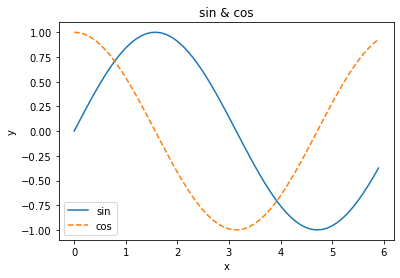

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
x = np.arange(0, 6, 0.1) # 0에서 6까지 0.1 간격으로 생성
y1 = np.sin(x)
y2 = np.cos(x)

# 그래프 그리기
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle="--", label="cos")
plt.xlabel("x")
plt.ylabel("y")
plt.title('sin & cos')
plt.legend()
plt.show()



## Perceptron

### AND GATE ( Rough )

In [44]:
def AND(x1,x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


### AND GATE ( Practical )

In [45]:
# y = 0 if b + w1x1 + w2x2 <= 0
# y = 1 if b + w1x1 + w2x2 > 0

def AND(x1,x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b 
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

print(AND(0,0)) 
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


### NAND GATE

In [46]:
# y = 0 if b + w1x1 + w2x2 >= 0
# y = 1 if b + w1x1 + w2x2 < 0

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = 0.7
    tmp = b + np.sum(w*x)
    if tmp < 1.7:
        return 1
    else:
        return 0

print(NAND(0,0)) 
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


### OR GATE

In [47]:
def OR(x1, x2):
    x = np.array([x1, x2])
    b  = 0.7
    w = [0.5, 0.5]
    tmp = b + np.sum(x*w)
    
    if tmp >= 1:
        return 1
    else:
        return 0
    
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


### NOR GATE

In [48]:
def NOR(x1, x2):
    x = np.array([x1, x2])
    w = [0.5, 0.5]
    b = 0
    tmp = b + np.sum(x*w)
    
    if tmp == 0 or tmp == 1:
        return 1
    else:
        return 0

print(NOR(0,0))
print(NOR(0,1))
print(NOR(1,0))
print(NOR(1,1))

1
0
0
1


### XOR GATE

In [49]:
def XOR(x1, x2):
    return AND(NAND(x1,x2), OR(x1,x2))
    
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


## Neural Network

### Step function

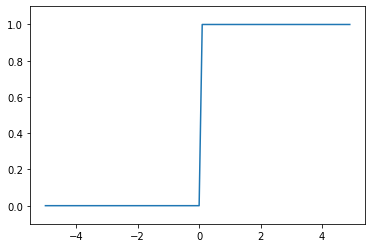

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
        return np.array(x>0, dtype = int)
    
x = np.arange(-5.0, 5.0, 0.1)
y = step(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid function

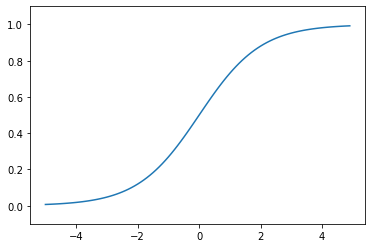

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU function

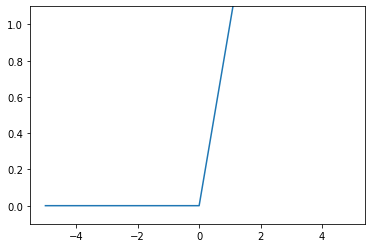

In [78]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### 3-layer perceptron 

In [97]:
import numpy as np

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1,0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    #Layer1
    a1 = np.dot(x, W1) + b1T
    z1 = sigmoid(a1)
    
    #Layer 2
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    #Layter 3
    a3 = np.dot(z2, W3) + b3
    y = a3
    
    return y

network = init_network()
x = np.array([0.5, 0.5])
y = forward(network,x)

print(y)

[0.31443565 0.69095765]


### MNIST Inference

In [6]:
# Data check

import sys, os
sys.path.append("C:/Users/ImedisynRnD2/Documents/GitHub/Deep learning from scratch/deep-learning-from-scratch-master")

from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [8]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [18]:
# Image check

import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (t_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]

print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [51]:
# Let's Predict

import pickle

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

# Get data
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

# Initializae network
def init_network():
    with open("C:/Users/ImedisynRnD2/Documents/GitHub/Deep learning from scratch/deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

# predict
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    
    y = softmax(a3)
    
    return y 


x,t = get_data()
network = init_network()

print(np.shape(network['W3']))

tmp = 0
for i in range(len(x)):
  
    y = predict(network, x[i])
    pred = np.argmax(y)
    
    if pred==t[i]:
        tmp += 1
    
print('Accuracy : %s%%' % str(tmp/len(x)*100))

(100, 10)
Accuracy : 93.52000000000001%


### Batch 처리 : forward propagation 

In [61]:
x, t = get_data()
network = init_network()

batch_size = 100 # batch size
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    
#    print(i)
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt / len(x))))

Accuracy:0.9352


### 오차제곱합 (Sum of squares for error, SSE)

In [67]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def SSE(y,t):
    return 0.5 * np.sum((np.array(y)-np.array(t))**2)

print(SSE(y,t))

y = [0.1, 0.05, 0.0, 0.6, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(SSE(y,t))

0.09750000000000003
0.6974999999999999


### 교차엔트로피 (Cross-Entrophy error, CEE)

In [71]:
def CEE(y,t):
    delta = 1e-7  # y = 0 인경우 Inf값이 되므로 이를 방지하기 위함
    return -np.sum(t * np.log(np.array(y) + delta))

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # inference = 2, target = 2
print(CEE(y,t))

y = [0.1, 0.05, 0.0, 0.6, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # inference = 3, target = 3
print(CEE(y,t))

0.510825457099338
16.11809565095832


### Mini batch

In [76]:
# data loading

import sys, os
sys.path.append("C:/Users/ImedisynRnD2/Documents/GitHub/Deep learning from scratch/deep-learning-from-scratch-master")
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [81]:
# batch indexing

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [115]:
# Cross validation for batch ( for one-hot label)

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

def CEE_for_batch_onehot(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

print(CEE_for_batch_onehot(y,t))


# Cross validation for batch ( for label )

def CEE_for_batch_label(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

print(CEE_for_batch_label(y,t))

0.510825457099338
23.718987110506905


### Gradient


In [166]:
def function_2(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f,x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) #x와 형상이 같은 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx] = tmp_val-h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값 복원
        
    return grad

### Gradient descent

In [146]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    return x    

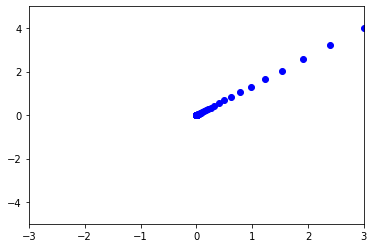

In [284]:
# gradient descent apply
import matplotlib.pyplot as plt

def function_2(x):
    return x[0]**2 + x[1]**2

def gradient_descent_trace(f, init_x, lr =1e-1, step_num = 200):
    x = init_x
    grad_trace = np.zeros([step_num,2])
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        grad_trace[i,:] = x
        plt.plot(grad_trace[i][0], grad_trace[i][1], 'bo')
        x -= lr * grad
    
    plt.ylim([-5,5])
    plt.xlim([-3,3])
    plt.show()
    
    return x, grad_trace

x = np.array([3.0, 4.0])

[x, grad_trace] = gradient_descent_trace(function_2, x)



In [298]:
### SimpleNET

import sys, os
sys.path.append("C:/Users/ImedisynRnD2/Documents/GitHub/Deep learning from scratch/deep-learning-from-scratch-master")
import numpy as np
from common.gradient import numerical_gradient
from common.functions import softmax, cross_entropy_error

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss
    
net = simpleNet()
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p) # 최댓값 인덱스

t = np.array([0, 0, 1]) #정답 인덱스
net.loss(x, t)


def f(W):
    return net.loss(x,t)

dW = numerical_gradient (f, net.W)
print(dW)

# f(W) by more simple function

f = lambda w: net.loss(x,t)
dw = numerical_gradient(f, net.W)
print(dw)

[ 1.25369288 -0.20692978  0.73713428]
[[ 0.32810869  0.07615131 -0.40426   ]
 [ 0.49216303  0.11422696 -0.60639   ]]
[[ 0.32810869  0.07615131 -0.40426   ]
 [ 0.49216303  0.11422696 -0.60639   ]]


### 2 Layer Net

In [314]:
import sys, os
sys.path.append("C:/Users/ImedisynRnD2/Documents/GitHub/Deep learning from scratch/deep-learning-from-scratch-master")
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init = 0.01):
        
        #initialization weight
        
        self.params = {}
        self.params['W1'] = weight_init * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        
        self.params['W2'] = weight_init * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        
        a2 = np.dot(z1, W2) + b2
        z2 = softmax(a2)
        
        return z2
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y)
        t = np.argmax(t)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}    
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        

net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)

print(net.params['W1'].shape)


(784, 100)


### 미니배치 학습 구현하기


In [321]:
import sys, os
sys.path.append("C:/Users/ImedisynRnD2/Documents/GitHub/Deep learning from scratch/deep-learning-from-scratch-master")

import numpy as np
from mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []

#Hyperparameter
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    
    if i%1000 == 0:
        print(str(i) + 'th iter is processing...')
    
    #get mini batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #calculate gradient
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
    
    #record training 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    


0th iter is processing...
1000th iter is processing...
2000th iter is processing...
3000th iter is processing...
4000th iter is processing...
5000th iter is processing...
6000th iter is processing...
7000th iter is processing...
8000th iter is processing...
9000th iter is processing...


## Backpropagation

### MulLaer (곱셉 노드)

In [336]:
class MulLayer:
    def __init__(self):
        self.x = None  # x,y를 초기화. forward시 input값을 유지하기 위해서.
        self.y = None
    
    def forward(self,x,y):
        self.x = x
        self.y = y
        out = x*y
        return out
    
    def backward(self,dout):
        dx = dout * self.y # x와 y를 바꿈
        dy = dout * self.x
        
        return dx, dy

### APPLE SHOPING 

In [337]:
apple = 100
apple_num = 2
tax = 1.1

# layers
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward propagation
apple_price = mul_apple_layer.forward(apple,apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

# backward propagation
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax)

220.00000000000003
2.2 110.00000000000001 200


### AddLayer (덧셈노드)

In [345]:
class AddLayer:
    def __init__(self):
        pass     #초기화 필요없음
        
    def forward(self,x,y):
        self.x = x
        self.y = y
        out = x+y
        return out
    
    def backward(self,dout):
        dx = dout*1
        dy = dout*1
        return dx, dy
    

### 사과 귤 쇼핑 연습문제

In [347]:
apple = 100
apple_num = 2
oran = 150
oran_num = 3
tax = 1.1

apple_layer = MulLayer()
oran_layer = MulLayer()
apple_oran_layer = AddLayer()
price_layer = MulLayer()

# forward
apples = apple_layer.forward(apple, apple_num)
orans = oran_layer.forward(oran, oran_num)
apple_oran = apple_oran_layer.forward(apples, orans)
price = price_layer.forward(apple_oran, tax)

print(price)

# Backprop
dout = 1
dprice, dtax = price_layer.backward(dout)
dapples, dorans  = apple_oran_layer.backward(dprice)
dapple, dapple_num = apple_layer.backward(dapples)
doran, doran_num = oran_layer.backward(dorans)

print(dprice, dtax, dapples, dorans, dapple, dapple_num, doran, doran_num)

715.0000000000001
1.1 650 1.1 1.1 2.2 110.00000000000001 3.3000000000000003 165.0


### ReLU 계층 ( taeham )

In [397]:
class ReLU:
    def __init__(self):
        self.x = None
        
    def forward(self,x):
        
        self.x = x
        self.x[self.x<=0]=0
        
        return self.x
        
    def backward(self,out):
        out[self.x<=0] = 0
        
        return out

relu = ReLU()
#print(relu.forward(1))
print(relu.forward(np.array([0])))
print(relu.backward(np.array([2])))
#print(relu.backward(2))


[0]
[0]


### ReLU 계층 (textbook)


In [383]:
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0 
        
        return out

    def backwrd(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx
    
relu = Relu()

print(relu.forward(np.array([0])))

[0]


### Sigmoid 계층 

In [1]:
class Sigmoid: 
    def __init__(self):
        #self.x = None
        self.out = None
    
    def forward(self, x):
        out =  1 / (1 + np.exp(-self.x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        
        dx = dout * self.out * (1 - self.out)
        
        return dx

### Affine 계층

In [1]:
class Affine:
    def __init__(self, W,b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        
        return dx

### Affine layer for batch

In [1]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        
        dx = np.dot(self.W.T, dout)
        self.dW = np.dot(dout, self.x.T)
        self.db = np.sum(dout, axis=0)
        
        return dx

### Softmax-with-Loss


In [2]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None 
        self.y = None
        self.t = None
    
    def forward(self, x, t):
        self.y = softmax(x)
        self.t = t 
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx
    


## Two-layer Network With Backpropagation

In [5]:
#### INSTANCE ####

# params : save parameters by dictionary
# layers : save layers by dictionary with orders
# lastLayer : final layer. Softmax With Loss in Here

#### METHOD ####

# __init__(self, input_size, hidden_size, output_size, weight_init_std) : Initialzation
# predict(self, x) : forward propagation
# loss(self, x, t) : calculate cost by cost function 
# accuracy(self, x, t) : accuracy
# numerical_gradien(self, x, t): gradient by numerical difference
# gradient(self, x, t): gradient with backpropagation

import sys, os
sys.path.append("C:/Users/ImedisynRnD2/Documents/GitHub/Deep learning from scratch/deep-learning-from-scratch-master")
import numpy as np

from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std):
        
        #initializing
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
        #setup layers
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.lastLayer = SoftmaxWithLoss()
        
        
    def predict(self,x):
        
        #calculate forward propagation for all layers before softmax in orders.
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x 
        
    def loss(self, x, t):
        #calculate loss 
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        #calculate accuracy
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        
        if t.ndim != 1 : t = np.argmax(t, axis =1)   
        accuracy = np.sum(y == t) / float(x.shape[0])    
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
    
    def gradient(self, x, t):
        #forward propagation
        self.loss(x,t)
        
        #backpropagation
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        
        # save result
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        
        return grads 

## Training with backprop



In [6]:
import sys, os
sys.path.append("C:/Users/ImedisynRnD2/Documents/GitHub/Deep learning from scratch/deep-learning-from-scratch-master")
import numpy as np
from mnist import load_mnist

# read data
(x_train, t_train) , (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10, weight_init_std = 0.1)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # gradient
    grad = network.gradient(x_batch, t_batch)
    
    # update
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print(train_acc, test_acc)


0.0711 0.0681
0.82835 0.8279
0.8430166666666666 0.8405
0.85135 0.8493
0.8577166666666667 0.8534
0.9498833333333333 0.9483
0.9569166666666666 0.9551
0.9611166666666666 0.9572
0.9653 0.9592
0.9686666666666667 0.961
0.9707666666666667 0.9637
0.9726 0.9649
0.9742333333333333 0.9665
0.9751833333333333 0.9677
0.9774666666666667 0.9706
0.9769666666666666 0.9697
0.9791 0.9696


In [3]:
class SGD:
    def __init__(self, lr = 0.01):
        self. lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grad[key]